In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from time import time as tt

Reading the Datasets into python

In [ ]:
# Reading the dataset into Python
df = pd.read_csv('cStick.csv')

Printing the first 5 entering of the dataset

In [ ]:
# Displaying the first 5 dataset
df.head(5)

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [ ]:
# Printing out all the columns
print(df.columns)

Index(['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer',
       'Decision '],
      dtype='object')


In [ ]:
# Renaming the Decision column
df = df.rename(columns={'Decision ': 'Decision'})

In [ ]:
#CHECKING FOR MISSING DATA
dfm= df.isnull().sum()
print("Missing Data:\n", dfm)

Missing Data:
 Distance         0
Pressure         0
HRV              0
Sugar_level      0
SpO2             0
Accelerometer    0
Decision         0
dtype: int64


In [ ]:
# Viewing the shape of the dataset
df.shape

(2039, 7)

In [ ]:
# Describe function gives us the statistical values of the numerical columns
df.describe()

,Distance,Pressure,HRV,Sugar_level,SpO2,Accelerometer,Decision
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,28.694527,0.988720,95.657002,72.909243,83.563649,0.661599,0.988720
std,23.773644,0.815918,17.576499,46.940110,11.111592,0.473282,0.815918
min,0.000000,0.000000,60.000000,10.000000,60.000000,0.000000,0.000000
25%,7.642500,0.000000,82.418000,40.230000,75.285000,0.000000,0.000000
50%,20.560000,1.000000,97.238000,69.960000,85.280000,1.000000,1.000000
75%,55.205500,2.000000,109.695000,77.612500,92.692500,1.000000,2.000000
max,69.981000,2.000000,124.980000,179.293000,99.990000,1.000000,2.000000


Distribution of Oxygen Saturation

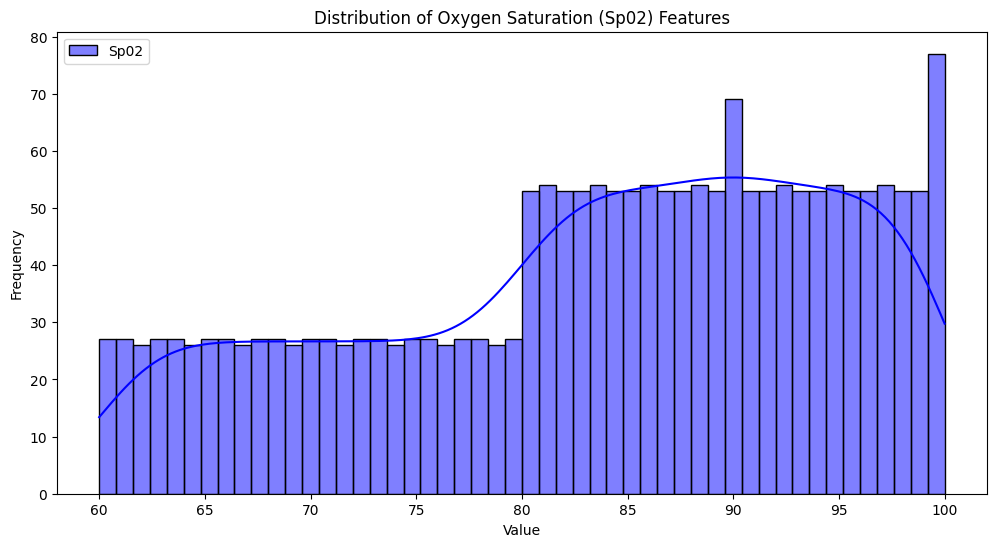

In [ ]:
#Data distribution
#plot histograms for Saturation of oxygen (SpO2) column
plt.figure(figsize=(12, 6))
sns.histplot(df['SpO2'], bins=50, kde=True, color='blue', label='Sp02')
plt.title('Distribution of Oxygen Saturation (Sp02) Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Distribution of Heart Rate Variability

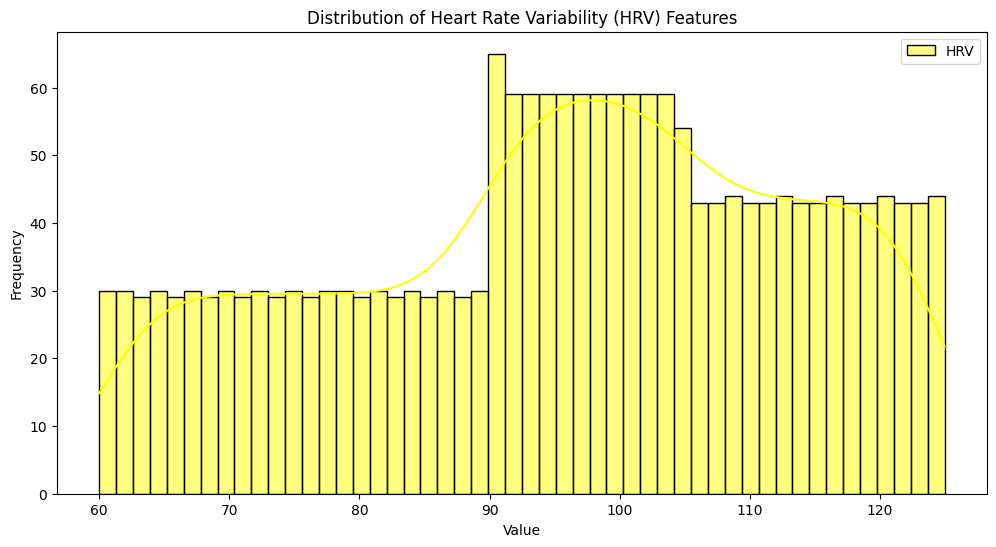

In [ ]:
#Data distribution
#plot histograms for Distribution of Heart Rate Variability (HRV) column
plt.figure(figsize=(12, 6))
sns.histplot(df['HRV'], bins=50, kde=True, color='yellow', label='HRV')
plt.title('Distribution of Heart Rate Variability (HRV) Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Distribution of Sugar level

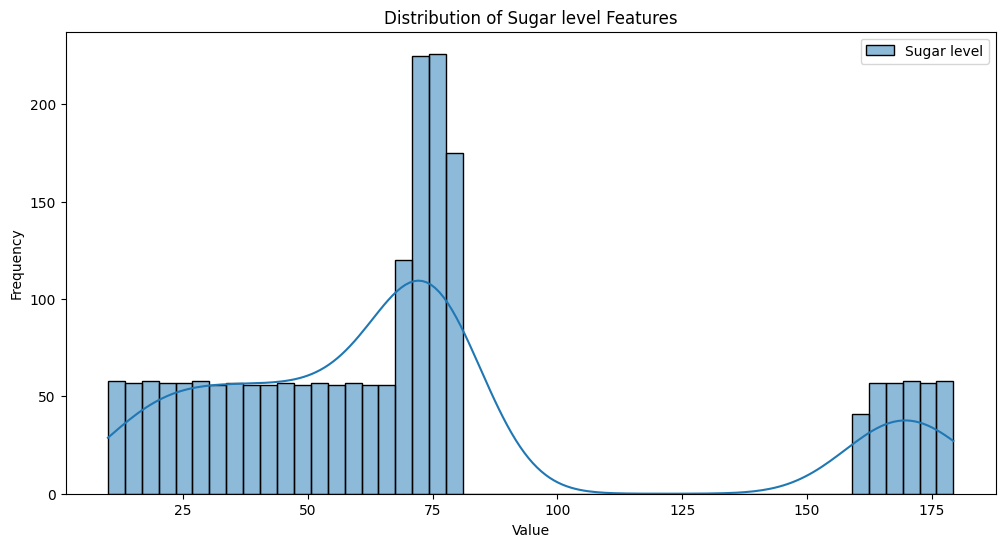

In [ ]:
#Data distribution
#plot histograms for the Distribution of Sugar Level
plt.figure(figsize=(12, 6))
sns.histplot(df['Sugar level'], bins=50, kde=True,  label='Sugar level')
plt.title('Distribution of Sugar level Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# let's list all numerical features
numerical_columns= ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']


In [ ]:
# Initializing a new dataset with all numerical columns
numerical_columns_df= df[['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']]


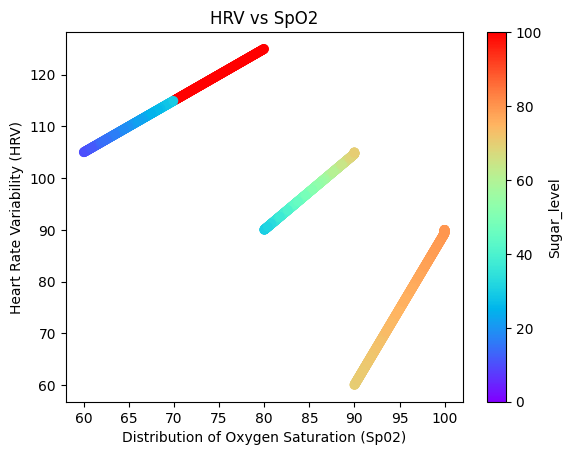

In [ ]:
#plt.style.use('seaborn')
plt.scatter(df['SpO2'], df['HRV'], c = df['Sugar level'], vmin=0, vmax=100, cmap='rainbow')
plt.colorbar(label='Sugar_level')
plt.xlabel('Distribution of Oxygen Saturation (Sp02)')
plt.ylabel('Heart Rate Variability (HRV)')
plt.title('HRV vs SpO2')
plt.show()

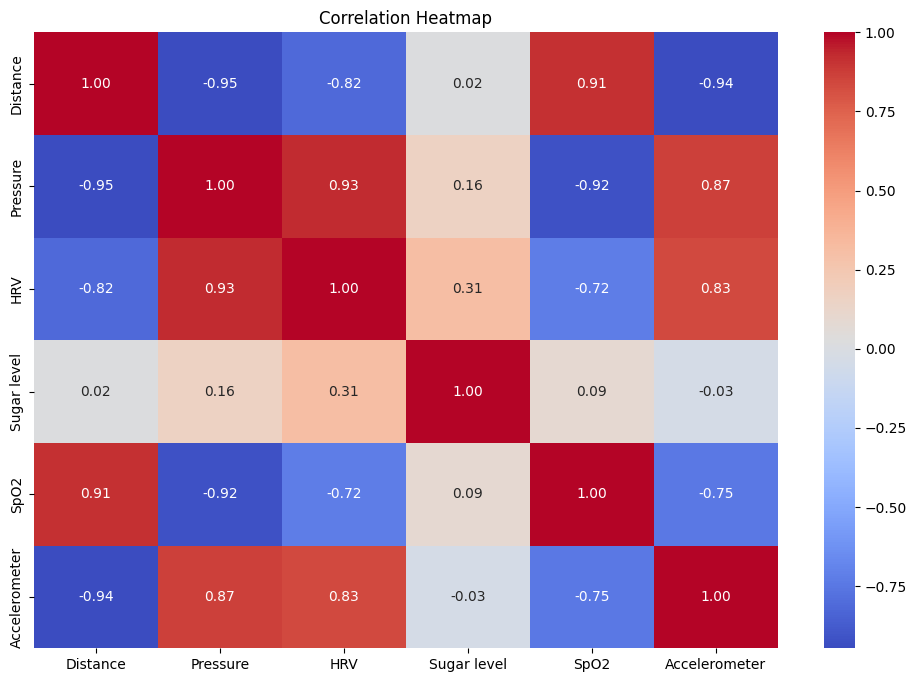

In [ ]:
# Correlation Heatmap to indentify features that correlate
import seaborn as sns
correlation_matrix = numerical_columns_df.corr()
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
df.head(5)

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,prediction of fall
1,2.595,2.0,110.190,20.207,65.190,1.0,definite fall
2,68.067,0.0,87.412,79.345,99.345,0.0,no fall detected
3,13.090,1.0,92.266,36.180,81.545,1.0,prediction of fall
4,69.430,0.0,89.480,80.000,99.990,0.0,no fall detected


In [ ]:
# Rename the Decision column
df.loc[df['Decision'] == 0,'Decision'] = 'no fall detected'
df.loc[df['Decision'] == 1,'Decision'] = 'prediction of fall'
df.loc[df['Decision'] == 2,'Decision'] = 'definite fall'

<ipython-input-58-75bf422b9dfa>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no fall detected' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Decision'] == 0,'Decision'] = 'no fall detected'


In [ ]:
# Creating the training dataset for the machine learning implementation
X = df.drop('Decision', axis=1)
print(X)


      Distance  Pressure      HRV  Sugar level    SpO2  Accelerometer
0       25.540       1.0  101.396       61.080  87.770            1.0
1        2.595       2.0  110.190       20.207  65.190            1.0
2       68.067       0.0   87.412       79.345  99.345            0.0
3       13.090       1.0   92.266       36.180  81.545            1.0
4       69.430       0.0   89.480       80.000  99.990            0.0
...        ...       ...      ...          ...     ...            ...
2034     5.655       2.0  116.310      162.242  71.310            1.0
2035     9.660       2.0  124.320      177.995  79.320            1.0
2036    15.220       1.0   93.828       40.440  82.610            1.0
2037     9.120       2.0  123.240      175.871  78.240            1.0
2038    62.441       0.0   78.876       76.435  96.435            0.0

[2039 rows x 6 columns]


In [ ]:
# Creating the Label dataset for the machine learning implementation
Y = df['Decision']
print(Y)

# Count of the occurrence of each label
print(Y.value_counts())

0       prediction of fall
1            definite fall
2         no fall detected
3       prediction of fall
4         no fall detected
               ...        
2034         definite fall
2035         definite fall
2036    prediction of fall
2037         definite fall
2038      no fall detected
Name: Decision, Length: 2039, dtype: object
Decision
no fall detected      690
prediction of fall    682
definite fall         667
Name: count, dtype: int64


In [ ]:
# Spliting the dataset with 60% for training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


Creating a column Tranformer to Scale all the numerical column

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# create column transformer
ct = ColumnTransformer(
    [
        (
            "scaling", # --> name of the transformation
            StandardScaler(), # --> main function to apply
            numerical_columns, #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple.
)


Creating a machine learining pipeline to perform Stochastic Gradient Descent classification

In [ ]:
# Create the machine learning pipeline for SGDClassifier
clf_ = Pipeline(
        steps =[('ct', ct),
              ('classifier', SGDClassifier(loss='log_loss', random_state=0)),
      ]
    )

In [ ]:
# Set up the hyper-parameters to test
parameters = {'classifier__eta0': np.logspace(-5,-1,3), # the initial learning rate value (try printing np.logspace(-6,-1,5) to see what comes up...)
              'classifier__learning_rate': ['constant'],#, different strategies for the learning rate across iterations, check documentations for more details
              'classifier__class_weight': ['balanced', None],
              'classifier__alpha': [0.0001, 0.01] # Constant that multiplies the regularization term. The higher the value, the stronger the regularization.
             }


In [ ]:
# create the GridSearch function

clf_search = GridSearchCV(clf_, parameters, scoring= "accuracy", cv= 5)

# Also note the parameter cv: this controls how many folds we want to use.
# cv=5 means we are doing 5-folds cross-validation

# Fit all the possible hyper-parameters combinations using cross-validation:
# original data
# let's also time the process
t0 = tt()
_ =clf_search.fit(X_train, y_train)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')




Time taken to train gridsearch: 1.82 seconds.


In [ ]:
# Get the best estimator for further analysis of the results using the test set

best_clf = clf_search.best_estimator_

In relationship to the decision of falls (0- no fall detected, 1- person slipped/tripped/prediction of fall and 2- definite fall)

                    precision    recall  f1-score   support

     definite fall       1.00      1.00      1.00       267
  no fall detected       1.00      1.00      1.00       284
prediction of fall       1.00      1.00      1.00       265

          accuracy                           1.00       816
         macro avg       1.00      1.00      1.00       816
      weighted avg       1.00      1.00      1.00       816



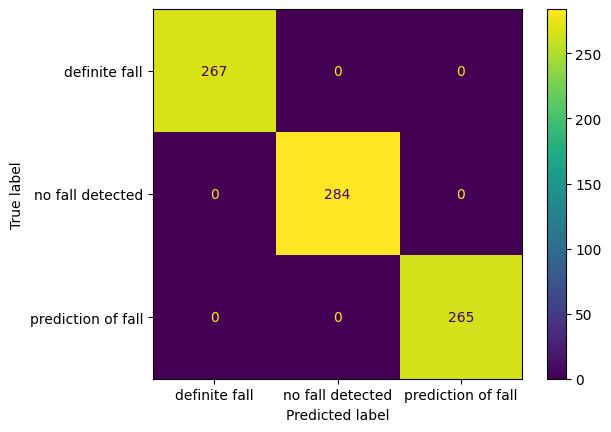

In [ ]:
#Compute predictions and evaluation metrics using the best estimator
# original data
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))


cm= ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)